이전 강의에서 학습한 모델을 활용하여 새로운 이미지를 분류해보겠습니다. 


In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# train set 에서 10000개를 validation set으로 나눔
x_val, y_val = x_train[50000:,:], y_train[50000:]   # 50000~59999까지 validation으로 나눔
x_train, y_train = x_train[:50000, :], y_train[:50000] # 0~49999까지 train set으로 저장


In [4]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


In [5]:
# 데이터 표준화

import numpy as np
mean = np.mean(x_train, axis=0)  


In [6]:
std = np.std(x_train)  # 표준편차를 계산합니다. 

In [7]:
x_train_centered = (x_train-mean)/std
x_val_centered = (x_val-mean)/std
x_test_centered = (x_test-mean)/std

In [8]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

In [9]:
# model 만들기

from tensorflow.keras import layers, models
model = models.Sequential()

In [10]:
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))

In [11]:
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())


In [12]:
# dense layer에 넣기
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [15]:
x_train_c = x_train_centered.reshape(-1, 28,28,1)  # -1은 추정으로 정한다
x_val_c = x_val_centered.reshape(-1,28,28,1)
x_test_c = x_test_centered.reshape(-1,28,28,1)

In [16]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5', monitor='val_loss',
                                 save_best_only=True),
                 TensorBoard(log_dir='logs/{}'.format(time.asctime()))]

In [17]:
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=10,
                  validation_data=(x_val_c, y_val_onehot), 
                  callbacks=callback_list)

Epoch 1/10
782/782 [==============================] - 15s 5ms/step - loss: 0.1141 - acc: 0.9650 - val_loss: 0.0473 - val_acc: 0.9869
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0407 - acc: 0.9876 - val_loss: 0.0419 - val_acc: 0.9873
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0444 - val_acc: 0.9893
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0453 - val_acc: 0.9876
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0166 - acc: 0.9949 - val_loss: 0.0381 - val_acc: 0.9893
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0517 - val_acc: 0.9903
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0153 - acc: 0.9954 - val_loss: 0.0547 - val_acc: 0.9880
Epoch 8/10
782/782 [==============================] - 4s 5ms/step - loss: 0

위에서 학습한 모델을 불러와 봅시다. 
위에서 파일이름을 cnn_checkpoint.h5로 저장했습니다. 

추후 모델을 활용하여 분류할 때는 이 파일만 있으면 됩니다. 

In [18]:
!ls

cnn_checkpoint.h5  logs  sample_data


In [20]:
model_trained = tf.keras.models.load_model('cnn_checkpoint.h5')

evaluate()을 통해서 테스트셋에 대한 정확도를 평가해봤습니다. 

학습 모델에서 onehot encoding을 적용하였기 때문에 동일하게 onehot encoding을 사용한 데이터를 넣어주었습니다. 

In [22]:
model_trained.evaluate(x_test, y_test_onehot )

313/313 [==============================] - 1s 3ms/step - loss: 14.2702 - acc: 0.9350


[14.270174980163574, 0.9350000023841858]

이제 테스트 이미지를 넣어서 예측을 해보겠습니다. 

예측할 때는 predict() 사용합니다. 이때 중요한 것은 학습할 때 x_train과 동일한 형태로 넣어줘야 한다는 점입니다. 

In [24]:
predicted_y = model_trained.predict(x_test)

In [25]:
predicted_y[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

onehot 인코딩 되어있는데, 이를 argmax를 사용하여 원래 y 형태로 변경하여 원래 값과 비교하겠습니다. 

In [41]:
y_pred = predicted_y.argmax(axis=1)  # axis는 2번째 차원에서 최대값을 같는 인덱스를 구하기 위해 1을 넣어주었습니다. 

In [42]:
y_pred[0]

7

confusion matrix(혼동 행렬)를 통해서 어떤 분류가 잘 안되었는지 확인해보겠습니다. 

텐서플로우의 confution_matrix(실제값, 예측값)을 넣어주면 행렬 형태로 갯수가 나옵니다


In [43]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)    

In [45]:
confusion_mtx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    0,    0,    0,    9,    0],
       [   0,  870,  173,    8,    3,    0,    0,    6,   75,    0],
       [   0,    0,  982,   24,    0,    0,    0,    1,   25,    0],
       [   0,    0,    2, 1007,    0,    0,    0,    0,    1,    0],
       [   0,    0,    1,    1,  938,    0,    1,    1,   17,   23],
       [   1,    0,    0,   25,    0,  800,    1,    0,   65,    0],
       [   1,    0,    2,    2,    3,    4,  929,    0,   17,    0],
       [   0,    1,    8,   29,    0,    0,    0,  961,   28,    1],
       [   0,    0,    0,    3,    0,    0,    0,    0,  971,    0],
       [   3,    0,    0,   16,    0,    3,    0,    0,   63,  924]],
      dtype=int32)>

heatmap plot으로 시각화를 해보겠습니다. 

matplotlib 기반의 그래프 라이브러리인 seaborn을 활용해보겠습니다. 

seaborn은 matplotlib 그래프 중 자주 사용하는 그래프의 디자인 및 사용방법을 변경한 라이브러리입니다. 

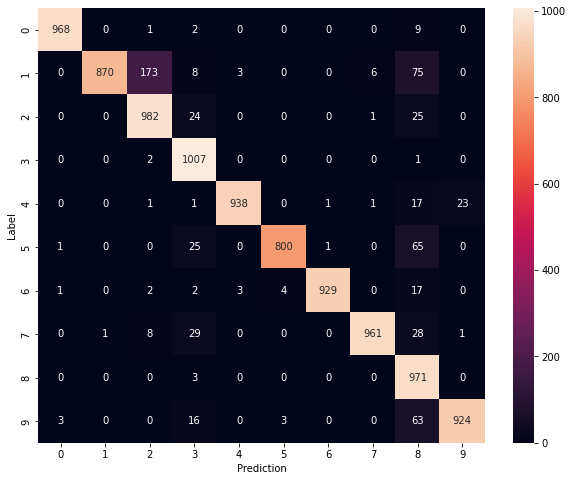

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

2로 예측했는데, 1인 경우가 많았습니다. 